In [5]:
from sympy import Symbol, Derivative, symbols
a= Symbol('a')
b= Symbol('b')
function = '3.2*(y-a*x-b)**2'
partialderiv= Derivative(function, a)
dfa = partialderiv.doit()
partialderiv= Derivative(function, b)
dfb = partialderiv.doit()
xa = [0.2,0.4,0.6,0.8]
ya = [2.4,3.8,4.2,4.6]

print(f'first order derivatives of given function are de/dm = {dfb} ,de/dc = {dfa}')

bs = 2
a1 = 1.0 
b1 = -1.0  
itr = 1000 
learning_rate = 0.1  

ns = len(xa)
nb = ns//bs
ms = ns%bs

for i in range(0,itr):
    for k in range(0,nb):
        dfav1 = 0
        dfdv1 = 0
        for j in range(0,bs):
            index = k*bs + j
           
            a = symbols('a')
            b = symbols('b')
            x = symbols('x')
            y = symbols('y')
            dfav = dfa.subs(a, a1) 
            dfav = dfav.subs(b, b1) 
            dfav = dfav.subs(x, xa[index]) 
            dfav = dfav.subs(y, ya[index]) 
            dfav = round(dfav,2)
            dfdv = dfb.subs(b, b1) 
            dfdv = dfdv.subs(a, a1) 
            dfdv = dfdv.subs(x, xa[index]) 
            dfdv = dfdv.subs(y, ya[index]) 
            dfdv = round(dfdv,2)
            dfav1 += dfav
            dfdv1 += dfdv
            
        dfav1 = dfav1/bs
        dfdv1 = dfdv1/bs

        dfav1 = round(dfav1,2)
        dfdv1 = round(dfdv1,2)

        
        da = (-1.0)*learning_rate*dfav1
        db = (-1.0)*learning_rate*dfdv1
        
        a1 = a1 + da 
        b1 = b1 + db
       
    k = nb
if(ms>0):
    dfav1 = 0
    dfdv1 = 0
    for j in range(0,ms):
        index = k*bs + j
        
        a = symbols('a')
        b = symbols('b')
        x = symbols('x')
        y = symbols('y')
        dfav = dfa.subs(a, a1) 
        dfav = dfav.subs(b, b1) 
        dfav = dfav.subs(x, xa[index]) 
        dfav = dfav.subs(y, ya[index]) 
        dfdv = dfb.subs(b, b1) 
        dfdv = dfdv.subs(a, a1) 
        dfdv = dfdv.subs(x, xa[index]) 
        dfdv = dfdv.subs(y, ya[index]) 
        dfav1 += dfav
        dfdv1 += dfdv

        dfav1 = dfav1/ms
        dfdv1 = dfdv1/ms

    
    da = (-1.0)*learning_rate*dfav1
    db = (-1.0)*learning_rate*dfdv1
   
    a1 = a1 + da 
    b1 = b1 + db

a1= round(a1,2)
b1= round(b1,2)
print(a1, b1)
print(f'minimum value  at a = {a1} ,b= {b1} for given function')

first order derivatives of given function are de/dm = 6.4*a*x + 6.4*b - 6.4*y ,de/dc = -6.4*x*(-a*x - b + y)
3.37 2.04
minimum value  at a = 3.37 ,b= 2.04 for given function


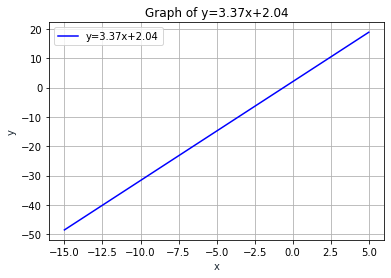

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-15,5,100)
y = a1*x+b1
plt.plot(x, y, '-b', label='y='+str(a1)+'x+'+str(b1))
plt.title('Graph of '+'y='+str(a1)+'x+'+str(b1))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [7]:
data_pred = []
for i in xa:
    data_pred.append(a1*i+b1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ya,data_pred)
print(f"mean square error : {mse}")

mean square error : 0.07646360397338862
